# FUNCTIONAL API

- Sequential Format

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense 
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
seq_format = Sequential([
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
]) 

### Functional API: 
+ define input
+ define layers 
+ define model 

In [ ]:
# step 1: 
input = Input(shape=(28, 28))

In [ ]:
# step 2:
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
# step 3:
func_model = Model(inputs=input, outputs=predictions)

# LAB 1


In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
import pydot 
from tensorflow.keras.utils import plot_model

- sequential api

In [ ]:
def build_model_with_sequential():
  seq_model = tf.keras.models.Sequential([
      Flatten(input_shape=(28,28)), 
      Dense(128, activation='relu'), 
      Dense(10, activation='softmax')
  ])
  return seq_model

- functional api

In [ ]:
def build_model_with_functional():
  input_layer = Input(shape=(28, 28))
  x = Flatten()(input_layer) 
  x = Dense(128, activation='relu')(x) 
  output_layer = Dense(10, activation = 'softmax')(x)
  func_model = Model(input_layer, output_layer)
  return func_model
  

- test pydot, build model and visualize the graph

In [ ]:
model = build_model_with_functional()

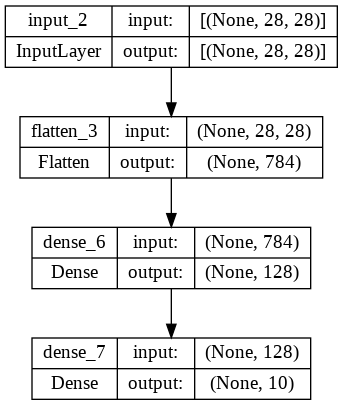

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')


- Train the model 

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
training_images = training_images/255.0
testing_images = testing_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss = tf.keras.losses.sparse_categorical_crossentropy, 
    metrics = ['accuracy']
)
model.fit(training_images, training_labels, epochs=5) 


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3759 - accuracy: 0.8651
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3340 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3111 - accuracy: 0.8861
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2937 - accuracy: 0.8906
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8964


In [ ]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8725


[0.3521454632282257, 0.8725000023841858]

# branching/ Multi-outputs


- Note: model like Inception have different brand to learn different fts and then concatenated 

In [ ]:
# func_model = Model(
    #inputs = [input_layer_1, input_layer_2], 
    #outputs = [output_layer_1, output_layer_2])

- [?] hình có 3 kênh màu sẽ input ntn ? có flatten ra hay không ?
- [?] neural network có learn quadratic function ko ?


In [40]:
def model():
  input = Input(shape = (8, ))
  x = Dense(128, activation='relu')(input)
  second = Dense(128, activation='relu')(input)
  third = Dense(64, activation = 'relu', name='y1')(second)
  y1 = Dense(1, name='y1')(second)
  y2 = Dense(1, name='y2')(third)
  model = Model(inputs=input, outputs=[y1, y2])
  return model